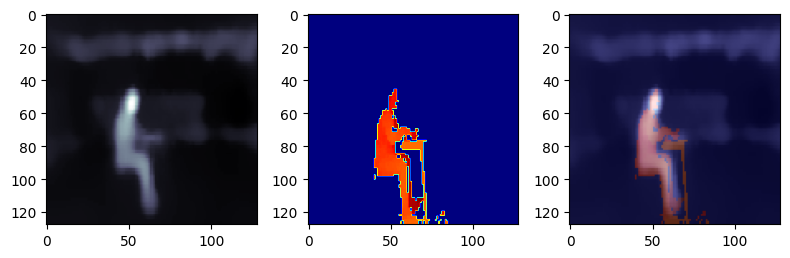

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def resize_images(thermal_image_path, depth_image_path, output_size=(128, 128), interpolation_method=Image.NEAREST):
    # Load the thermal and depth images
    thermal_image = Image.open(thermal_image_path)
    depth_image = Image.open(depth_image_path)
    
    # Resize the images using nearest neighbor interpolation
    resized_thermal = thermal_image.resize(output_size, interpolation_method)
    resized_depth = depth_image.resize(output_size, interpolation_method)
    
    return resized_thermal, resized_depth

# Paths to your original images
thermal_image_path = 'training_data/Thermal_Depth/data_128x128/aligned_thermal/00250.png'  # Change this to your thermal image file path
depth_image_path = 'training_data/Thermal_Depth/data_128x128/aligned_depth/00250.tiff'  # Using the depth image from before

# Resize the images
img_t, img_d = resize_images(thermal_image_path, depth_image_path)

img_t = np.array(img_t)
img_d = np.array(img_d)

max_val = np.max(img_d)  # You might need to adjust this based on your depth data
min_val = np.min(img_d)
resized_d_normalized = (img_d - min_val) / (max_val - min_val)

# Ensure thermal image is in the same 0-1 range
resized_t_normalized = img_t / 255.0 

colored_d = cv2.applyColorMap(np.uint8(resized_d_normalized * 255), cv2.COLORMAP_JET)
colored_t = cv2.applyColorMap(np.uint8(resized_t_normalized * 255), cv2.COLORMAP_BONE)

combined_img = cv2.addWeighted(colored_t, 1, colored_d, 0.3, 0)

plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.imshow(img_t, cmap='bone')

plt.subplot(1,3,2)
plt.imshow(img_d, cmap='jet')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))

plt.tight_layout()  # Adjust layout to not overlap images
plt.show()


In [12]:
from PIL import Image
import os
import numpy as np
import imageio

def resize_images(input_dir, output_dir, image_type, output_size=(256, 256), interpolation_method=Image.NEAREST):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List all files in the input directory
    files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]
    
    # Iterate over all files in the directory
    for file in files:
        # Construct the full file path
        file_path = os.path.join(input_dir, file)
        # Load the image
        image = Image.open(file_path)
        # Resize the image
        resized_image = image.resize(output_size, interpolation_method)
        # Construct the output file path
        output_file_path = os.path.join(output_dir, file)
        # Save the resized image
        if image_type == 'thermal':
            resized_image.save(output_file_path, 'PNG')
        elif image_type == 'depth':
            # Convert PIL image to OpenCV format if necessary
            resized_image_cv = np.array(resized_image)
            # Save the depth image in TIFF format with floating point values
            #cv2.imwrite(output_file_path, resized_image_cv.astype(np.float32))
            imageio.imwrite(output_file_path, resized_image_cv)

# Paths to your original images directories
thermal_images_dir = 'training_data/Thermal_Depth/data_256x256/aligned_thermal'  # Change this to your thermal images directory path
depth_images_dir = 'training_data/Thermal_Depth/data_256x256/aligned_depth'  # Change this to your depth images directory path

# Output directories
output_thermal_dir = 'training_data/Thermal_Depth/data_256x256/resized_thermal'  # Change this to your output directory for thermal images
output_depth_dir = 'training_data/Thermal_Depth/data_256x256/resized_depth'  # Change this to your output directory for depth images

# Resize and save all images
resize_images(thermal_images_dir, output_thermal_dir, 'thermal')
resize_images(depth_images_dir, output_depth_dir, 'depth')


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

img_d = imageio.v2.imread("training_data/Thermal_Depth/resized_depth/00001.tiff")
img_t = cv2.imread('training_data/Thermal_Depth/resized_thermal/00001.png', cv2.IMREAD_GRAYSCALE)

# print(img_d[20:30, 15:25])
# print(img_t.shape)

max_val = np.max(img_d) 
min_val = np.min(img_d)
resized_d_normalized = (img_d - min_val) / (max_val - min_val)

resized_t_normalized = img_t / 255.0

colored_d = cv2.applyColorMap(np.uint8(resized_d_normalized * 255), cv2.COLORMAP_JET)
colored_t = cv2.applyColorMap(np.uint8(resized_t_normalized * 255), cv2.COLORMAP_BONE)

combined_img = cv2.addWeighted(colored_t, 0.5, colored_d, 0.5, 0)

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1) 
plt.imshow(cv2.cvtColor(img_t, cv2.COLOR_BGR2RGB))
plt.title('Thermal Image')

plt.subplot(1, 3, 2)  
plt.imshow(img_d, cmap='jet')
plt.title('cleaned depth')

plt.subplot(1, 3, 3)  
plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
plt.title('Combined Image')

plt.tight_layout()  # Adjust layout to not overlap images
plt.show()


Intrinsic Parameters: Intrinsics: [ 640x480  p[313.77 253.838]  f[457.18 456.633]  None [0 0 0 0 0] ]


Minimum pixel value: 8 --> 3.8776470588235292
Maximum pixel value: 140 --> 1.8588235294117648


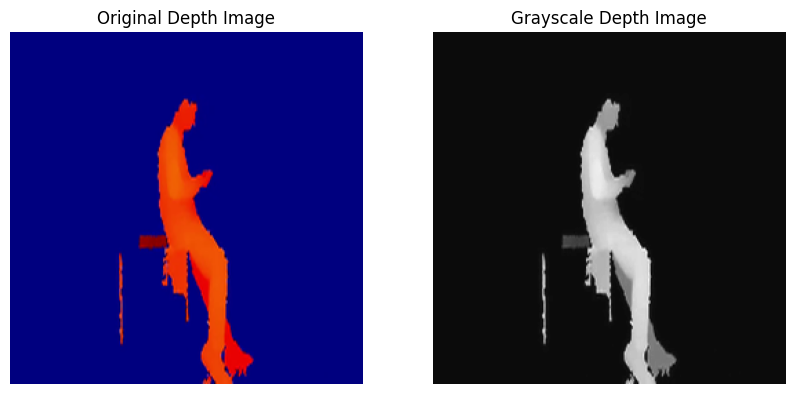

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the depth image (replace 'your_image.png' with your image file)
depth_image = cv2.imread('monocular_dataset/li/data_256/train/depth/01500.png')

# Convert the depth image to grayscale
gray_image = cv2.cvtColor(depth_image, cv2.COLOR_BGR2GRAY)

# Define the original and target ranges
original_range = np.array([0, 255])
new_range = np.array([4, 0.1])

# Find the minimum and maximum values in the grayscale image
min_val = np.min(gray_image)
max_val = np.max(gray_image)

min_interpolated = np.interp(min_val, original_range, new_range)
max_intrepolated = np.interp(max_val, original_range, new_range)

# Print the minimum and maximum values
print(f'Minimum pixel value: {min_val} --> {min_interpolated}')
print(f'Maximum pixel value: {max_val} --> {max_intrepolated}')

# Visualize the original and the grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(depth_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color visualization
plt.title('Original Depth Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')  # Show the grayscale image
plt.title('Grayscale Depth Image')
plt.axis('off')

plt.show()
